# <span style="color:red"> NUMERICAL EXERCISES 09 </span>

## <span style="color:blue">Exercise 09.1</span>

###### The Traveling Salesman Problem
- The aim of this JN is to solve the Traveling Salesman Problem (TSP) with $n=34$ cities (randomly placed in a case on a circle of radius 1, in the other case on a square of side 1) using Genetic Algorithms (GAs).


- The TSP consists of determining the fastest path to visit the $n$ cities and return to the starting city. 
For the circumference case, I will consider 'good' a solution less than $2\pi$ (the length of the circumference) and I will use this info to set the parameters of the algorithm. For the square case, I have no information about the solution, so I will use the same parameters as in the previous case.


- The GAs take their inspiration from the natural evolutionary process and the recombination of genes in reproduction and work as follows:

    1) $M$ possible solutions to the problem are generated (in this case: permutation vectors of the first $n$ natural numbers, each of which is a label for a city). This is the 'zero generation'. Each possible solution (vector) is called a 'chromosome', the set of chromosomes is called a 'population'. A measure of the goodness of a chromosome is called 'fit'.

    2) The current generation is used to reproduce and create a new population, with which it will be replaced. This is the next generation. Reproduction takes place in the following ways (the cycle is repeated until $M$ new chromosomes (sons) are created):\
     A- SELECTION: two chromosomes (parents) are selected, with the higher probability the greater is their fit (law of the strongest: the best one reproduces).\
     B- CROSSOVER: two chromosomes (sons) are generated as partially shuffled copies of the parents. This occurs with probability $P_c=0.65$, otherwise sons are generated as copies of the parents (recombination of genes: crossing-over).\
     C- MUTATIONS: with probability $P_m=0.1$ for each mutation, each son undergoes a mutation that slightly changes the chromosome (genetic mutations).

    3) The process is repeated for $G$ generations.
    
    
 - GAs (or other sophisticated algorithms) are needed to solve the TSP, since the number of possible solutions is $(n-1)!/2$ (counting degenerations), if $n$ are cities. With $n=34$ the number of solutions is of the order of $10^{38}$, so the 'brute force' algorithm, though is the simplest and (in infinite time) the most effective, is totally inadequate in finite time. 
To give an idea: by running the program of this exercise (circumference case: solution is 'good' under $2\pi$) for a number of generations $G=10^6$, much larger than that used, and a population of $M=100$ (so $10^8$ solution proposals, about 10 minutes of running time) but with the modification that each generation is created randomly, I did not find a solution that falls below 20. The graph below shows, for the circumference case, the fit of the best individual as a function of generations using and not using GAs (still in preliminary version).

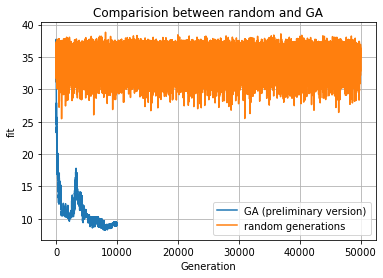

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x,y = np.loadtxt("data/besties_preliminar.txt",usecols=(0,1), unpack = 'true')
x2,y2 = np.loadtxt("data/besties_random.txt",usecols=(0,1), unpack = 'true')
x2=x2[0:50000]
y2=y2[0:50000]
plt.plot(x,y, label='GA (preliminary version)')
plt.plot(x2,y2, label='random generations')
plt.title('Comparision between random and GA')
plt.xlabel('Generation')
plt.ylabel('fit')
plt.grid(True)
plt.legend()

plt.show()

###### GA Specifications

The description of GAs given above leaves some open questions.
- How large to choose the population (M)?
- How many generations (G) are needed?
- How to choose parents during the selection?
- How to make cross-over occur?
- How to make mutations take place?

For the first question, I arbitrarily choose $M=1000$ after some trials. For the second question, I noticed that after 1000 generations, the minimum value hardly varies, and the average of the better half of the population is close to the value of the minimum. This means that evolution is almost complete, or anyway would proceed only very slowly, so I choose $G=1000$.\
For the last two questions, I refer to the cplusplus code.\
The questions of selection of parents is more sensitive and I will deserve a more detailed answer.

###### Selection of parents

For the choice of parents during selection, I tried two methods.
1) The first is to sort the population vector in ascending order according to the total path relative to each chromosome, and then choose the chromosome as the j-th element of that vector with j given by: $j= floor(M \times r^p)$, with r random in (0,1).\
2) The second is the Rigged Roulette method: you set an increasing function $f$ according to path convenience, and choose the chromosome with probability $\frac{f(chromosome)}{\sum_{all the chromosomes} f(chromosome)}$. As $f$ I chose $(1/path(chromosome))^p$

To choose the best exponent p, I compare in the graph below the convergence as the method and p vary. The best method is the first with p=5.

Observations: 
1) p=1 means that every chromosome has the same chance of being chosen, so it is not surprising that it is inconvenient;\
2) for p<5 the good chromosomes have too little importance and convergence is slow;\
3) maybe p=5 is not the best value, but it seems good and I choose it because for p>>5 there is the danger that good chromosomes could have too much importance and convergence could be slow because it could be hard to move away from the best available solutions, which would still not be the best possible solutions;\
4) I expected the Roulette method to be more efficient, instead convergence is better with the other (Actually before implementing mutations the roulette was more convenient).

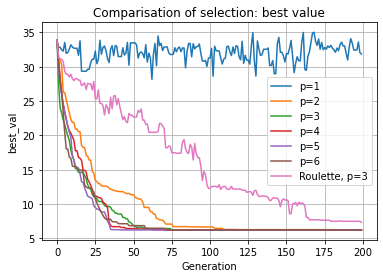

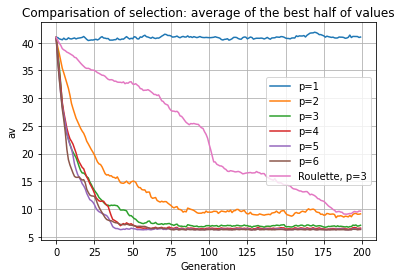

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

g, y1, av1 = np.loadtxt("data/besties1.txt",usecols=(0,1,2), unpack = 'true')
y2, av2 = np.loadtxt("data/besties2.txt",usecols=(1,2), unpack = 'true')
y3, av3 = np.loadtxt("data/besties3.txt",usecols=(1,2), unpack = 'true')
y4, av4 = np.loadtxt("data/besties4.txt",usecols=(1,2), unpack = 'true')
y5, av5 = np.loadtxt("data/besties5.txt",usecols=(1,2), unpack = 'true')
y6, av6 = np.loadtxt("data/besties6.txt",usecols=(1,2), unpack = 'true')
yr, avr = np.loadtxt("data/bestiesr.txt",usecols=(1,2), unpack = 'true')
G=200
g=g[0:G]
y1=y1[0:G]
av1=av1[0:G]
y2=y2[0:G]
av2=av2[0:G]
y3=y3[0:G]
av3=av3[0:G]
y4=y4[0:G]
av4=av4[0:G]
y5=y5[0:G]
av5=av5[0:G]
y6=y6[0:G]
av6=av6[0:G]
yr=yr[0:G]
avr=avr[0:G]

plt.plot(g, y1, label='p=1')
plt.plot(g, y2, label='p=2')
plt.plot(g, y3, label='p=3')
plt.plot(g, y4, label='p=4')
plt.plot(g, y5, label='p=5')
plt.plot(g, y6, label='p=6')
plt.plot(g, yr, label='Roulette, p=3')
plt.title('Comparisation of selection: best value')
plt.xlabel('Generation')
plt.ylabel('best_val')
plt.grid(True)
plt.legend()

plt.figure()
plt.plot(g, av1, label='p=1')
plt.plot(g, av2, label='p=2')
plt.plot(g, av3, label='p=3')
plt.plot(g, av4, label='p=4')
plt.plot(g, av5, label='p=5')
plt.plot(g, av6, label='p=6')
plt.plot(g, avr, label='Roulette, p=3')
plt.title('Comparisation of selection: average of the best half of values')
plt.xlabel('Generation')
plt.ylabel('av')
plt.grid(True)
plt.legend()

plt.show()

###### The importance of mutations

To emphasize the importance of mutations, I have made two graphs showing how adding mutations makes convergence faster.
Note that without mutations and only with crossover the value to which we converge is about 23, and thinking that the circumference is $2\pi$ long the value is clearly not good.

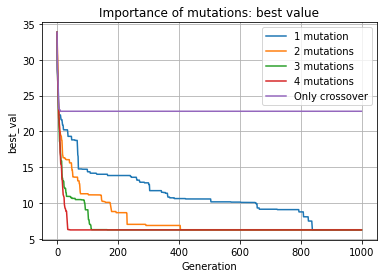

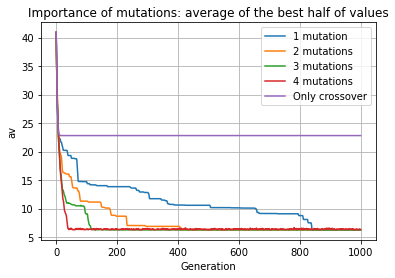

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

g, y1, av1 = np.loadtxt("data/bestiesm1.txt",usecols=(0,1,2), unpack = 'true')
y2, av2 = np.loadtxt("data/bestiesm2.txt",usecols=(1,2), unpack = 'true')
y3, av3 = np.loadtxt("data/bestiesm3.txt",usecols=(1,2), unpack = 'true')
y4, av4 = np.loadtxt("data/bestiesm4.txt",usecols=(1,2), unpack = 'true')
yc, avc = np.loadtxt("data/bestiesc.txt",usecols=(1,2), unpack = 'true')

plt.plot(g, y1, label='1 mutation')
plt.plot(g, y2, label='2 mutations')
plt.plot(g, y3, label='3 mutations')
plt.plot(g, y4, label='4 mutations')
plt.plot(g, yc, label='Only crossover')
plt.title('Importance of mutations: best value')
plt.xlabel('Generation')
plt.ylabel('best_val')
plt.grid(True)
plt.legend()

plt.figure()
plt.plot(g, av1, label='1 mutation')
plt.plot(g, av2, label='2 mutations')
plt.plot(g, av3, label='3 mutations')
plt.plot(g, av4, label='4 mutations')
plt.plot(g, avc, label='Only crossover')
plt.title('Importance of mutations: average of the best half of values')
plt.xlabel('Generation')
plt.ylabel('av')
plt.grid(True)
plt.legend()

plt.show()

###### RESULTS: CIRCUMFERENCE CASE

Having fixed all the parameters and explained the algorithm, I can finally apply it to the two TSP configurations.

The first configuration is the circumference configuration. I obtained a distance traveled of $6.248$.
Since the convergence for this configuration is discussed above, I report only the final path.
To emphasize the importance of mutations, I also report the final path in the execution of the program with no mutations.

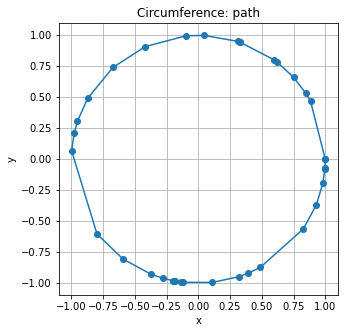

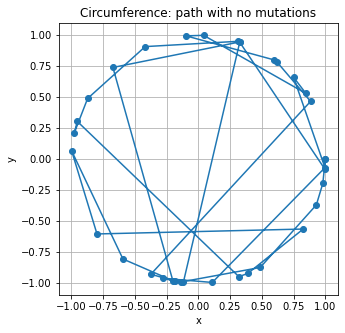

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

n=35

a=np.arange(n)
x,y = np.loadtxt("data/path_circ.txt",usecols=(0,1), unpack = 'true')
plt.figure(figsize=(5,5))
plt.plot(x,y, marker='o')
plt.title('Circumference: path')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

x,y = np.loadtxt("data/path_circ_wrong.txt",usecols=(0,1), unpack = 'true')
plt.figure(figsize=(5,5))
plt.plot(x,y, marker='o')
plt.title('Circumference: path with no mutations')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.show()

###### RESULT: SQUARE CASE

For this configuration, unlike before, I do not know a priori a path close to solving the problem. However, the algorithm created should be robust enough to find a good solution.

In the graphs below I show the convergence of the algorithm and the best path found, the value of which is $4.689$.

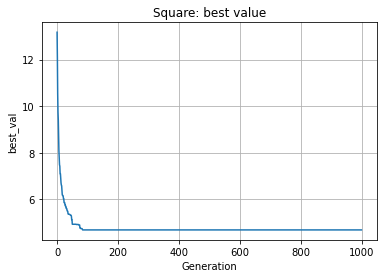

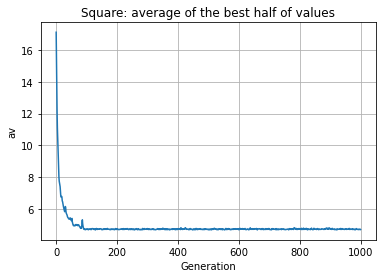

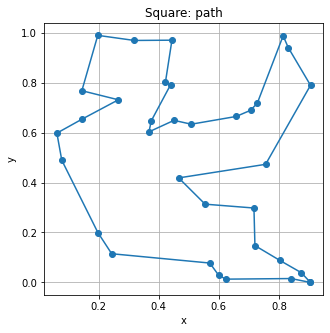

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

g, y1, av1 = np.loadtxt("data/besties_square.txt",usecols=(0,1,2), unpack = 'true')

plt.plot(g, y1)
plt.title('Square: best value')
plt.xlabel('Generation')
plt.ylabel('best_val')
plt.grid(True)

plt.figure()
plt.plot(g, av1)
plt.title('Square: average of the best half of values')
plt.xlabel('Generation')
plt.ylabel('av')
plt.grid(True)

n=35                      # Total number of SA steps (temperatures)

a=np.arange(n)
x,y = np.loadtxt("data/path_square.txt",usecols=(0,1), unpack = 'true')
plt.figure(figsize=(5,5))
plt.plot(x,y, marker='o')
plt.title('Square: path')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.show()